# Tarea 2

#### Tópicos Selectos De Matemáticas Aplicadas II: Análisis de Datos con Python

Fecha de entrega: Domingo 15 de junio 

Alan Badillo Salas

**1.** Dada la siguiente lista de vectores en $\mathbb{R}^3$:

```text
vectores = { [0, 1, 0], [1, 1, 0], [1, 2, 3], [-1, 0, 1], [0, 0, 1], [-1, 1, 0], [2, 1, 1], [3, 0.5, -1] }
```

escriba una función que calcule el **ángulo** que cada uno de estos vectores forma con respecto al vector fijo $\mathbf{a} = [1, 0, 0]$, y muestre únicamente aquellos vectores cuyo ángulo sea mayor a $80^\circ$, junto con el valor correspondiente del ángulo (en grados).




In [2]:
import numpy

def angulo(u, a = [1, 0, 0]):
    a = numpy.array(a)
    u = numpy.array(u)
    na = a.dot(a)
    nu = u.dot(u)
    return numpy.degrees(numpy.acos(a.dot(u) / (na * nu)))

In [25]:
vectores = [
    [0, 1, 0],
    [1, 1, 0],
    [1, 2, 3],
    [-1, 0, 1],
    [0, 0, 1],
    [-1, 1, 0],
    [2, 1, 1],
    [3, 0.5, -1],
]

for vec in vectores:
    t = angulo(vec)

    if t >= 80:
        print(f"({', '.join([f'{x:2.0f}' for x in vec])}) | {t:6.2f}°")

( 0,  1,  0) |  90.00°
( 1,  2,  3) |  85.90°
(-1,  0,  1) | 120.00°
( 0,  0,  1) |  90.00°
(-1,  1,  0) | 120.00°


**2.** Sea la siguiente función definida por partes:

$$
f(x, y) =
\begin{cases}
\sin(x^2 + y^2), & \text{si } x^2 + y^2 \leq 4 \\
\cos(x - y), & \text{si } 4 < x^2 + y^2 < 12  \\
-1, & \text{si }   12 \leq x^2 + y^2
\end{cases}
$$

Visualice la función en el dominio $ [-6, 6] \times [-6, 6] $ utilizando `plt.imshow()`.


In [42]:
x = numpy.linspace(-6, 6, 6)
y = numpy.linspace(-6, 6, 6)

X, Y = numpy.meshgrid(x, y)

X, Y

(array([[-6. , -3.6, -1.2,  1.2,  3.6,  6. ],
        [-6. , -3.6, -1.2,  1.2,  3.6,  6. ],
        [-6. , -3.6, -1.2,  1.2,  3.6,  6. ],
        [-6. , -3.6, -1.2,  1.2,  3.6,  6. ],
        [-6. , -3.6, -1.2,  1.2,  3.6,  6. ],
        [-6. , -3.6, -1.2,  1.2,  3.6,  6. ]]),
 array([[-6. , -6. , -6. , -6. , -6. , -6. ],
        [-3.6, -3.6, -3.6, -3.6, -3.6, -3.6],
        [-1.2, -1.2, -1.2, -1.2, -1.2, -1.2],
        [ 1.2,  1.2,  1.2,  1.2,  1.2,  1.2],
        [ 3.6,  3.6,  3.6,  3.6,  3.6,  3.6],
        [ 6. ,  6. ,  6. ,  6. ,  6. ,  6. ]]))

In [43]:
R = X ** 2 + Y ** 2

R

array([[72.  , 48.96, 37.44, 37.44, 48.96, 72.  ],
       [48.96, 25.92, 14.4 , 14.4 , 25.92, 48.96],
       [37.44, 14.4 ,  2.88,  2.88, 14.4 , 37.44],
       [37.44, 14.4 ,  2.88,  2.88, 14.4 , 37.44],
       [48.96, 25.92, 14.4 , 14.4 , 25.92, 48.96],
       [72.  , 48.96, 37.44, 37.44, 48.96, 72.  ]])

In [53]:
R <= 4

array([[False, False, False, False, False, False],
       [False, False, False, False, False, False],
       [False, False,  True,  True, False, False],
       [False, False,  True,  True, False, False],
       [False, False, False, False, False, False],
       [False, False, False, False, False, False]])

In [54]:
(R <= 4) * 1

array([[0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 1, 1, 0, 0],
       [0, 0, 1, 1, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0]])

In [59]:
(R <= 4) * numpy.sin(R).round(3)

array([[ 0.   , -0.   , -0.   , -0.   , -0.   ,  0.   ],
       [-0.   ,  0.   ,  0.   ,  0.   ,  0.   , -0.   ],
       [-0.   ,  0.   ,  0.259,  0.259,  0.   , -0.   ],
       [-0.   ,  0.   ,  0.259,  0.259,  0.   , -0.   ],
       [-0.   ,  0.   ,  0.   ,  0.   ,  0.   , -0.   ],
       [ 0.   , -0.   , -0.   , -0.   , -0.   ,  0.   ]])

In [64]:
Z = R * 0
Z += (R <= 4) * numpy.sin(R)
Z += ((R > 4) & (R < 12)) * numpy.cos(X - Y)
Z += (12 <= R) * (-1)

Z.round(3)

array([[-1.   , -1.   , -1.   , -1.   , -1.   , -1.   ],
       [-1.   , -1.   , -1.   , -1.   , -1.   , -1.   ],
       [-1.   , -1.   ,  0.259,  0.259, -1.   , -1.   ],
       [-1.   , -1.   ,  0.259,  0.259, -1.   , -1.   ],
       [-1.   , -1.   , -1.   , -1.   , -1.   , -1.   ],
       [-1.   , -1.   , -1.   , -1.   , -1.   , -1.   ]])

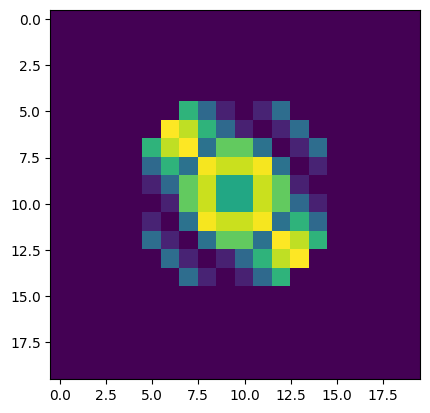

In [66]:
import matplotlib.pyplot as pyplot

x = numpy.linspace(-6, 6, 20)
y = numpy.linspace(-6, 6, 20)

X, Y = numpy.meshgrid(x, y)

R = X ** 2 + Y ** 2

Z = R * 0
Z += (R <= 4) * numpy.sin(R)
Z += ((R > 4) & (R < 12)) * numpy.cos(X - Y)
Z += (12 <= R) * (-1)

pyplot.imshow(Z)

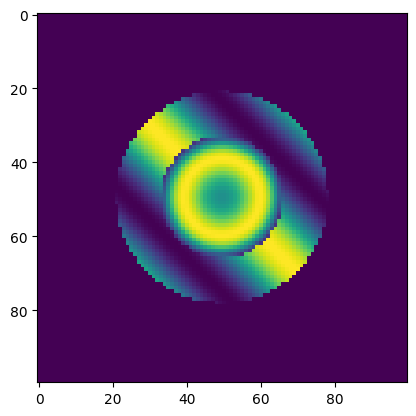

In [67]:
import matplotlib.pyplot as pyplot

x = numpy.linspace(-6, 6, 100)
y = numpy.linspace(-6, 6, 100)

X, Y = numpy.meshgrid(x, y)

R = X ** 2 + Y ** 2

Z = R * 0
Z += (R <= 4) * numpy.sin(R)
Z += ((R > 4) & (R < 12)) * numpy.cos(X - Y)
Z += (12 <= R) * (-1)

pyplot.imshow(Z)

**3.** Resuelva el siguiente sistema de ecuaciones lineales:

$$
\begin{aligned}
2x_1 - x_2 + 3x_3 + x_4 - x_5 &= 7 \\
x_1 + 2x_2 - x_3 + 2x_4 + x_5 &= 4 \\
3x_1 - x_2 + x_3 - x_4 + 2x_5 &= 10 \\
x_1 + x_2 + x_3 + x_4 + x_5 &= 5 \\
-2x_1 + 4x_2 + x_3 - 3x_4 + x_5 &= 0
\end{aligned}
$$

1. Resuelva el sistema.

2. Verifique la solución sustituyéndola en la ecuación original y evaluando $\| A \mathbf{x} - \mathbf{b} \|$.


In [68]:
A = numpy.array([
    [ 2, -1,  3,  1, -1],
    [ 1,  2, -1,  2,  1],
    [ 3, -1,  1, -1,  2],
    [ 1,  1,  1,  1,  1],
    [-2,  4,  1, -3,  1],
])

b = numpy.array([
    7, 
    4, 
    10, 
    5, 
    0
])

A, b

(array([[ 2, -1,  3,  1, -1],
        [ 1,  2, -1,  2,  1],
        [ 3, -1,  1, -1,  2],
        [ 1,  1,  1,  1,  1],
        [-2,  4,  1, -3,  1]]),
 array([ 7,  4, 10,  5,  0]))

In [75]:
x = numpy.linalg.inv(A).dot(b)

x

array([ 3.03448276,  1.        ,  0.86206897, -0.27586207,  0.37931034])

In [85]:
for i in range(len(A)):
    B = A.copy()

    B[:, i] = b

    xi = numpy.linalg.det(B) / numpy.linalg.det(A)

    print(f"x{i + 1} = {xi:11.8f}")

x1 =  3.03448276
x2 =  1.00000000
x3 =  0.86206897
x4 = -0.27586207
x5 =  0.37931034


**4.** Genera un array de 400 números aleatorios con distribución normal de media 10 y desviación estándar 2. 

- Calcula la media y desviación estándar de la muestra.

- ¿Cuántos valores están entre 8 y 12?

In [96]:
x = numpy.random.normal(10, 2, 400)

print(f"x = {x[:3]} ... {x[-3:]}")

print(f"media      : {x.mean()}")
print(f"desviación : {x.std()}")

x = [13.29341634  9.49770122  6.72190712] ... [ 9.53059329 14.22561822 12.04152874]
media      : 10.048053120840368
desviación : 2.0811410979828766


In [97]:
total = ((x >= 8) & (x <= 12)).sum()

print(f"|8 <= x <= 12| = {total} ({100 * total / 400:.2f}%)")

|8 <= x <= 12| = 275 (68.75%)


**5.** Simula una muestra de 200 observaciones donde cada valor puede ser 'A', 'B' o 'C' con probabilidades 0.5, 0.3 y 0.2, respectivamente (np.random.choice). Cuenta cuántas veces ocurre cada categoría.

In [105]:
cat = ["A", "B", "C"]

x = numpy.random.choice(cat, p=[0.5, 0.3, 0.2], size=200)

print(f"x = {x[:3]} ... {x[-3:]}")

x = ['A' 'C' 'A'] ... ['A' 'B' 'A']


In [108]:
for c in cat:
    total = (x == c).sum()
    print(f"{c}: {total} ({100 * total / 200:.1f}%)")

A: 112 (56.0%)
B: 53 (26.5%)
C: 35 (17.5%)


**6.** Genera una señal base (por ejemplo, todos 100) y agrégale ruido gaussiano con desviación 5.

- Grafica la señal ruidosa.

- Calcula el error medio cuadrático con respecto a la señal original:

$$
\text{RMSE} = \sqrt{ \frac{1}{n} \sum_{i=1}^n (y_i - \hat{y}_i)^2 }
$$

Donde:
- $y_i$ son los valores de la señal base,
- $\hat{y}_i$ son los valores de la señal ruidosa,
- $n$ es el número total de observaciones.

In [141]:
n = 200

y = numpy.ones(n) * 100

yp = y.copy()

for i in range(n):
    yp[i] += numpy.random.normal(0, 5, 1)[0]

print(f"y = {y[:3]} ... {y[-3:]}")
print(f"yp = {yp[:3]} ... {yp[-3:]}")

y = [100. 100. 100.] ... [100. 100. 100.]
yp = [ 94.03121373 108.03524829 102.57290729] ... [109.16251603 102.8492013   89.37277578]


(80.0, 120.0)

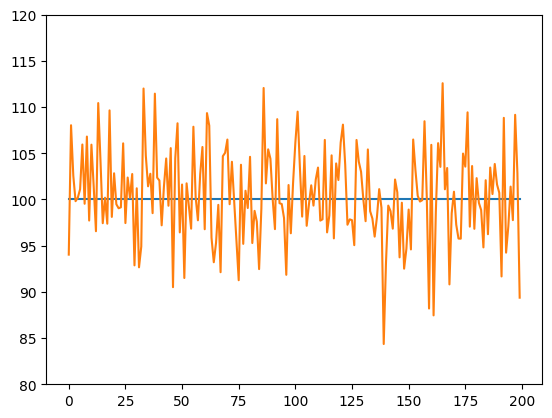

In [142]:
pyplot.plot(y)
pyplot.plot(yp)
pyplot.ylim(y.min() - 20, y.max() + 20)

In [148]:
RMSE = (((y - yp) ** 2).sum() / n) ** 0.5

print(f"RMSE: {RMSE:.6f}")

RMSE: 5.001866


y = [-1.22464680e-14 -3.15685498e+00 -6.31056313e+00] ... [6.31056313e+00 3.15685498e+00 1.22464680e-14]
yp = [ 6.29206401 -8.8599563  -0.80068193] ... [ 6.98639091  2.22134927 -0.63479369]
RMSE: 4.867467


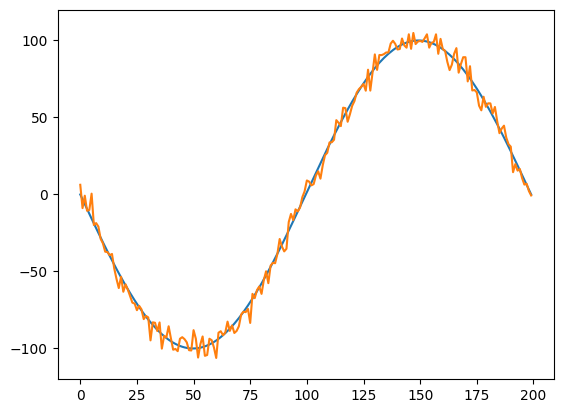

In [149]:
n = 200

x = numpy.linspace(-numpy.pi, numpy.pi, n)

y = numpy.sin(x) * 100

yp = y.copy()

for i in range(n):
    yp[i] += numpy.random.normal(0, 5, 1)[0]

print(f"y = {y[:3]} ... {y[-3:]}")
print(f"yp = {yp[:3]} ... {yp[-3:]}")

pyplot.plot(y)
pyplot.plot(yp)
pyplot.ylim(y.min() - 20, y.max() + 20)

RMSE = (((y - yp) ** 2).sum() / n) ** 0.5

print(f"RMSE: {RMSE:.6f}")

**7.** Dada la siguiente lista:

```python
cadenas = [
    '  juan*perez!!', 'ana#LOPEZ? ', 'm@rio@@gomez', 'luis* #MORA%%', 'carla!!méndóza ',
    'PEDRO?ROSALES###', 'sofia*#cano ', 'miguel//torres', 'lucia #ramirez:', ' josé+fernández  ',
    ' camila#RUIZ', 'marco*antonio&', 'isaBel!!GARZA', '#roberto flores* ', ' emiLIA?Reyes!',
    'DANIEL* #Martinez', '  andrés#s@las', '*pablo TORO/', ' yeSEnIa!lópez ', 'elena#morales?',
    'Nicolás*rodríguez', ' carmen?LUNA:', 'Rosa#*AVILA', 'oscar?*pineda;', 'alejandra!ríos+',
    'IGNACIO#HERRERA  ', ' sergio*MENDOZA', 'tomás#ramírez=', 'ANDREA!MORENO?', '#manuel ortíz ',
    'cristina*FLORES@', ' arturo#valdez;', 'LAURA*méndez', 'mariana?*ibarra!', ' esteban#quiroz ',
    'valeria!CASTILLO', 'renata#DE la cruz', 'fernando*?Vega:', 'irma!ZAPATA%', 'francisco#romero ',
    'alicia*Lara=', 'liliana#MENDEZ&', 'matías*#galván;', '#ricardo!Ríos', ' catalina*ALVARADO%',
    'gustavo!morales+', 'natalia#VILLARREAL:', 'andréa*páez;', '  Ramón*salinas!', ' david#molina '
]
```

1. Limpie la lista 'cadenas'
2. Obtenga 50 etiquetas con el código: `[f'id_{i:03}' for i in range(1, 51)]`
3. Obtenga un objeto Series con la lista 'cadenas' indexado con las etiquetas obtenidas. 


In [150]:
cadenas = [
    '  juan*perez!!', 'ana#LOPEZ? ', 'm@rio@@gomez', 'luis* #MORA%%', 'carla!!méndóza ',
    'PEDRO?ROSALES###', 'sofia*#cano ', 'miguel//torres', 'lucia #ramirez:', ' josé+fernández  ',
    ' camila#RUIZ', 'marco*antonio&', 'isaBel!!GARZA', '#roberto flores* ', ' emiLIA?Reyes!',
    'DANIEL* #Martinez', '  andrés#s@las', '*pablo TORO/', ' yeSEnIa!lópez ', 'elena#morales?',
    'Nicolás*rodríguez', ' carmen?LUNA:', 'Rosa#*AVILA', 'oscar?*pineda;', 'alejandra!ríos+',
    'IGNACIO#HERRERA  ', ' sergio*MENDOZA', 'tomás#ramírez=', 'ANDREA!MORENO?', '#manuel ortíz ',
    'cristina*FLORES@', ' arturo#valdez;', 'LAURA*méndez', 'mariana?*ibarra!', ' esteban#quiroz ',
    'valeria!CASTILLO', 'renata#DE la cruz', 'fernando*?Vega:', 'irma!ZAPATA%', 'francisco#romero ',
    'alicia*Lara=', 'liliana#MENDEZ&', 'matías*#galván;', '#ricardo!Ríos', ' catalina*ALVARADO%',
    'gustavo!morales+', 'natalia#VILLARREAL:', 'andréa*páez;', '  Ramón*salinas!', ' david#molina '
]

In [169]:
import pandas
import re

def limpiar(cadena):
    cadena = cadena.lower()
    cadena = re.sub("m@r", "mar", cadena)
    cadena = re.sub("[^\\w]", " ", cadena)
    cadena = re.sub("[ ]+", " ", cadena)
    cadena = cadena.strip()
    cadena = " ".join([nombre.capitalize() for nombre in cadena.split(" ")])
    return cadena

s = pandas.Series(cadenas).map(limpiar)

s.values

array(['Juan Perez', 'Ana Lopez', 'Mario Gomez', 'Luis Mora',
       'Carla Méndóza', 'Pedro Rosales', 'Sofia Cano', 'Miguel Torres',
       'Lucia Ramirez', 'José Fernández', 'Camila Ruiz', 'Marco Antonio',
       'Isabel Garza', 'Roberto Flores', 'Emilia Reyes',
       'Daniel Martinez', 'Andrés S Las', 'Pablo Toro', 'Yesenia López',
       'Elena Morales', 'Nicolás Rodríguez', 'Carmen Luna', 'Rosa Avila',
       'Oscar Pineda', 'Alejandra Ríos', 'Ignacio Herrera',
       'Sergio Mendoza', 'Tomás Ramírez', 'Andrea Moreno', 'Manuel Ortíz',
       'Cristina Flores', 'Arturo Valdez', 'Laura Méndez',
       'Mariana Ibarra', 'Esteban Quiroz', 'Valeria Castillo',
       'Renata De La Cruz', 'Fernando Vega', 'Irma Zapata',
       'Francisco Romero', 'Alicia Lara', 'Liliana Mendez',
       'Matías Galván', 'Ricardo Ríos', 'Catalina Alvarado',
       'Gustavo Morales', 'Natalia Villarreal', 'Andréa Páez',
       'Ramón Salinas', 'David Molina'], dtype=object)

In [174]:
s.index = [f"id_{i:03}" for i in range(1, 51)]

s

id_001            Juan Perez
id_002             Ana Lopez
id_003           Mario Gomez
id_004             Luis Mora
id_005         Carla Méndóza
id_006         Pedro Rosales
id_007            Sofia Cano
id_008         Miguel Torres
id_009         Lucia Ramirez
id_010        José Fernández
id_011           Camila Ruiz
id_012         Marco Antonio
id_013          Isabel Garza
id_014        Roberto Flores
id_015          Emilia Reyes
id_016       Daniel Martinez
id_017          Andrés S Las
id_018            Pablo Toro
id_019         Yesenia López
id_020         Elena Morales
id_021     Nicolás Rodríguez
id_022           Carmen Luna
id_023            Rosa Avila
id_024          Oscar Pineda
id_025        Alejandra Ríos
id_026       Ignacio Herrera
id_027        Sergio Mendoza
id_028         Tomás Ramírez
id_029         Andrea Moreno
id_030          Manuel Ortíz
id_031       Cristina Flores
id_032         Arturo Valdez
id_033          Laura Méndez
id_034        Mariana Ibarra
id_035        